In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import sqlalchemy
import MySQLdb
import matplotlib.pyplot as plt

# Load data:
engine = sqlalchemy.create_engine("mysql://logit:datascience@[2001:4860:4864:1:8dc:3328:b4fd:c43a]/Regression.db")
table_name = "college_data_clean"
coll = pd.read_sql_table(table_name,engine)

# Multiple Regression Lab

We got some basic models using only one variable to model 'MeanEarnings10Yrs'. Let's see if we can improve the situation by using more than one variable.

We will create a linear model for MeanEarnings10Yrs for "Private for-profit" colleges using AvgCostAttend and one more variable from

    'AvgCostAttend', 'AdmissionRate', 'AvgFacultySalary', 'FullTimeFacultyRate'

Let's create a new correlation analysis. We did one before for the whole college dataset, but since we are restricting the data here, we need to redo the analysis!

**Plot pairwise-scatterplots for the above avariables, for "Private for-profit" colleges.**

*Hint: Use `scatter_matrix` from `pandas.tools.plotting`.*

pandas.core.frame.DataFrame

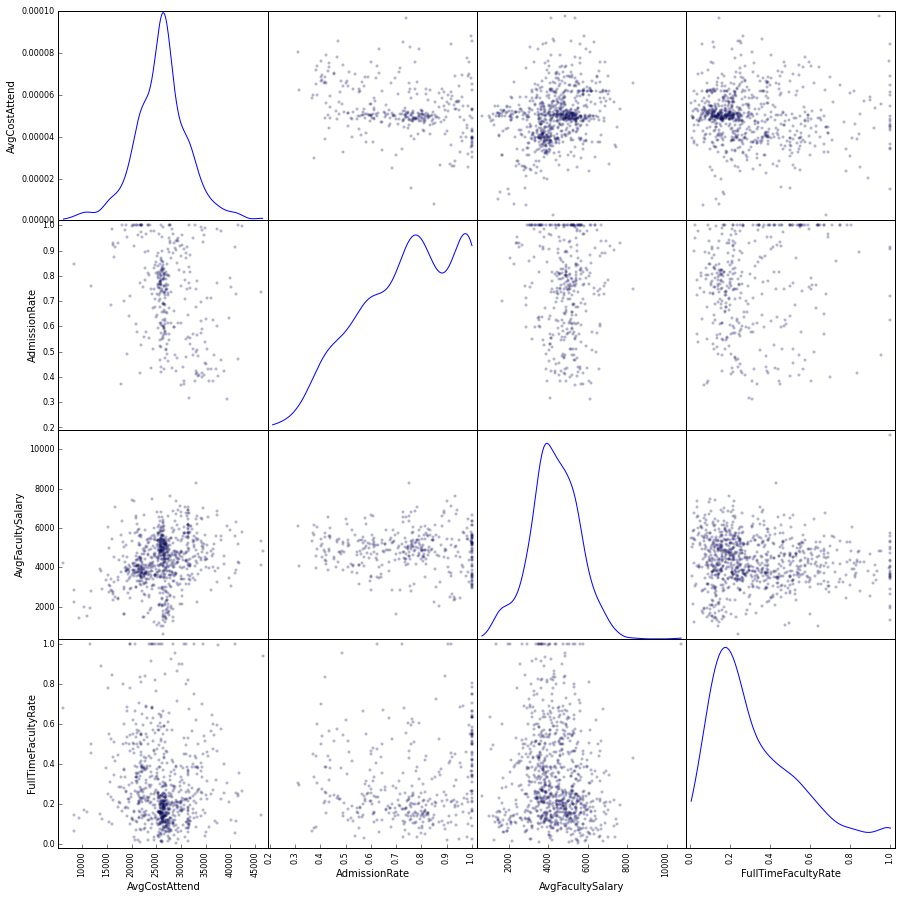

In [42]:
import statsmodels.formula.api as sm
from pandas.tools.plotting import scatter_matrix

priv_for_prof = coll[coll['PubPriv'] == 'Private for-profit']
priv_for_prof_model = sm.ols("MeanEarnings10Yrs ~ AvgCostAttend + AdmissionRate + AvgFacultySalary + FullTimeFacultyRate", data = priv_for_prof, missing = 'drop')
priv_for_prof_result = priv_for_prof_model.fit()
priv_for_prof_result.summary()

priv_for_prof_corr= priv_for_prof[['AvgCostAttend', 'AdmissionRate', 'AvgFacultySalary', 'FullTimeFacultyRate']]
scatter_matrix(priv_for_prof_corr, alpha=0.2, figsize=(15,15), diagonal='kde')


#scatter_matrix(priv_for_prof_result)
type(priv_for_prof_corr)

 
Note that our goal, for now, is simply to choose a non-correlated variable as a 
second predictor. In a future lab, we will handle choosing the *most predictive* features.  

**Print the correlation matrix from corr.**

In [43]:
priv_for_prof_corr.corr() 

,AvgCostAttend,AdmissionRate,AvgFacultySalary,FullTimeFacultyRate
AvgCostAttend,1.000000,-0.297120,0.269248,-0.071095
AdmissionRate,-0.297120,1.000000,-0.072690,0.107495
AvgFacultySalary,0.269248,-0.072690,1.000000,-0.085625
FullTimeFacultyRate,-0.071095,0.107495,-0.085625,1.000000


**Using statsmodels again, create a two feature model for 'MeanEarnings10Yrs' using 'FullTimeFacultyRate' in addition to 'AvgCostAttend'.**

In [47]:
two_feature_model = sm.ols("MeanEarnings10Yrs ~ AvgCostAttend + FullTimeFacultyRate", data=priv_for_prof, missing='drop')
two_feature_model = two_feature_model.fit()

two_feature_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MeanEarnings10Yrs   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     87.21
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.11e-34
Time:                        16:25:03   Log-Likelihood:                -7738.4
No. Observations:                 732   AIC:                         1.548e+04
Df Residuals:                     729   BIC:                         1.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            2.716e+04   1888.056     14.383      0.000      2.34e+04  3.09e+04
AvgCostAttend           0.5479      0.067      8.165      0.000         0.416     0.680
FullTimeFacultyRate -1.579e+04   1615.819     -9.774      0.000      -1.9e+04 -1.26e+04
==============================================================================
Omnibus:                       56.347   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.430
Skew:                           0.723   Prob(JB):                     2.28e-15
Kurtosis:                       3.350   Cond. No.                     1.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Does the model improve? How do you know?**

Hint: Explain how much of the remaining variance got explained by adding a new variable.

*Type your answer here.*

**If you haven't already, re-run the analysis with an interaction term (AvgCostAttend * FullTimeFacultyRate).**

Hint: You can still use R-style syntax.

In [48]:
model = sm.ols("MeanEarnings10Yrs ~ AvgCostAttend", data=priv_for_prof, missing='drop')
model=model.fit()
model.summary()

# 10% increase in R-squared by adding FullTimeFacultyRate



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MeanEarnings10Yrs   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     92.97
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           6.18e-21
Time:                        16:30:51   Log-Likelihood:                -8931.0
No. Observations:                 840   AIC:                         1.787e+04
Df Residuals:                     838   BIC:                         1.788e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2.051e+04   1683.576     12.185      0.000      1.72e+04  2.38e+04
AvgCostAttend     0.6102      0.063      9.642      0.000         0.486     0.734
==============================================================================
Omnibus:                       80.112   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.106
Skew:                           0.820   Prob(JB):                     1.11e-22
Kurtosis:                       3.447   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**What can you say from the p-value of the interaction term AvgCostAttend:FullTimeFacultyRate?**



*Type your answer here.*

In [49]:
# re-run the analysis with an interaction term (AvgCostAttend * FullTimeFacultyRate)
temp = sm.ols("MeanEarnings10Yrs ~ AvgCostAttend * FullTimeFacultyRate", data=priv_for_prof, missing='drop')
temp = temp.fit()
temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MeanEarnings10Yrs   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     58.85
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           4.54e-34
Time:                        16:47:12   Log-Likelihood:                -7737.4
No. Observations:                 732   AIC:                         1.548e+04
Df Residuals:                     728   BIC:                         1.550e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Intercept                          2.364e+04   3168.290      7.461      0.000      1.74e+04  2.99e+04
AvgCostAttend                         0.6809      0.117      5.805      0.000         0.451     0.911
FullTimeFacultyRate               -6011.7268   7257.283     -0.828      0.408     -2.03e+04  8235.973
AvgCostAttend:FullTimeFacultyRate    -0.3730      0.270     -1.382      0.167        -0.903     0.157
==============================================================================
Omnibus:                       57.754   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.489
Skew:                           0.727   Prob(JB):                     8.14e-16
Kurtosis:                       3.406   Cond. No.                     6.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The p-value of FullTimeFacultyRate